In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# display all the columns of dataframe
pd.pandas.set_option('display.max_columns', None)

## Import dataset

In [94]:
house_df = pd.read_csv('./datasets/house_price_data/train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

1. Missing values
2. All the numerical values
3. distribution of numerical values.
4. categorical variables.
5. outliers
6. relationship b/w dependent & independent variables

### MIssing values

In [96]:
house_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [98]:
# handlr features with missing values

In [100]:
features_nan = [features for features in house_df.columns if house_df[features].isnull().sum()>1]

In [102]:
features_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [104]:
for feature in features_nan:(
    print(f'''{feature}: {np.round(house_df[feature].isnull().mean(),
                        decimals=4)}% missing values'''))

LotFrontage: 0.1774% missing values
Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
MasVnrArea: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageYrBlt: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


## Independent and Dependent features

take each and every feature.
each feature has nan values.
if feature has nan value we mark it as 1. else mark it as 0
then group them by 1's and 0's. 

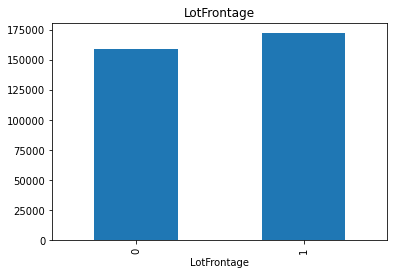

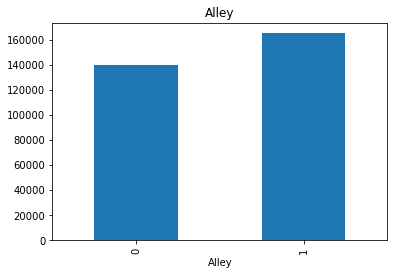

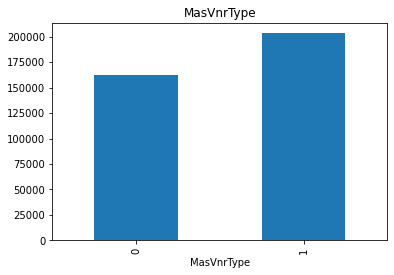

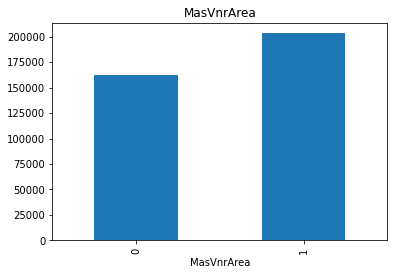

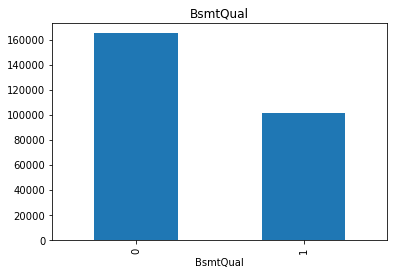

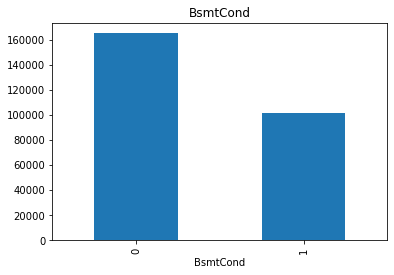

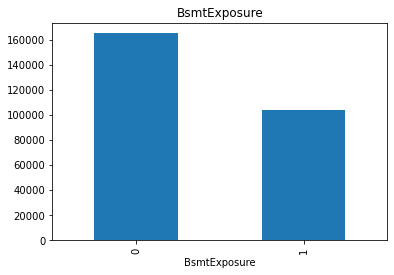

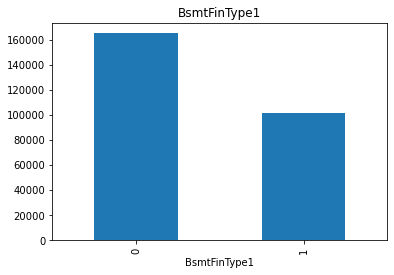

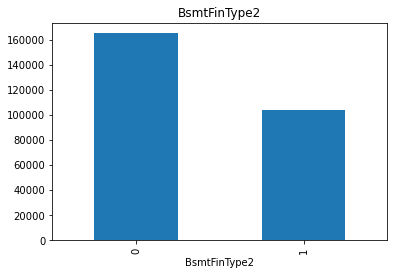

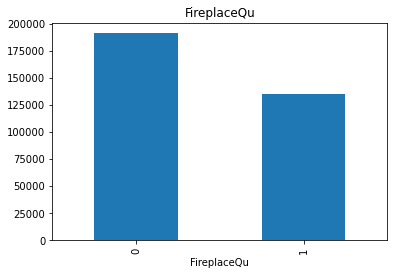

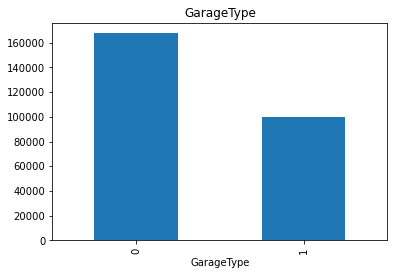

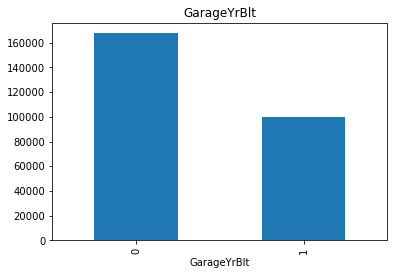

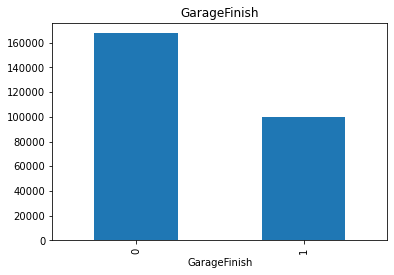

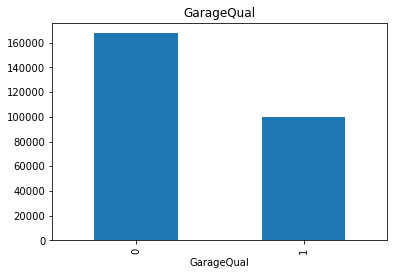

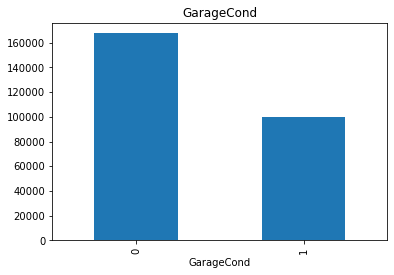

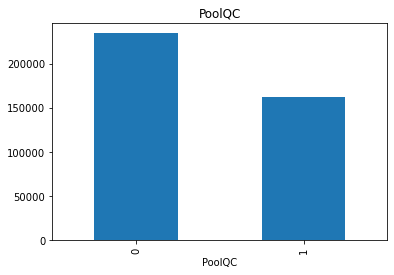

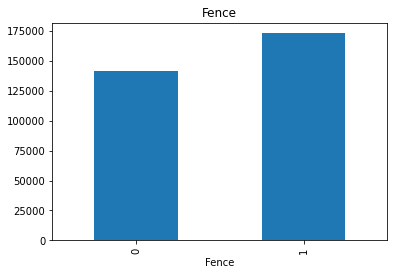

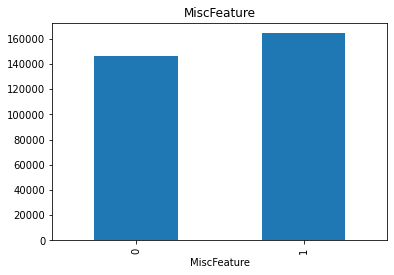

In [106]:
for feature in features_nan:
    # take copy of dataset
    df_copy = house_df.copy()
    # mark 1 with feature having null value
    df_copy[feature] = np.where(house_df[feature].isnull(),1,0)
    # calculate median sale price by grouping based on feature with nan values.
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

**Observations:**

for features having missing values, sales price are higher. When the missing values are there, price is high. 

Reason to use median is there are lot of outliers in salesprice feature.

<AxesSubplot:xlabel='SalePrice'>

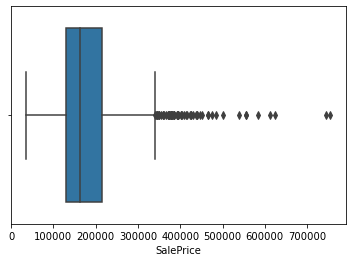

In [108]:
sns.boxplot(x=house_df['SalePrice'])

We can see lot of outliers present in dataset, so wwe use median.

## Numerical features

In [110]:
# list of numerical features with nan or missing values

In [112]:
numerical_features = [feature for feature in house_df.columns 
                      if house_df[feature].dtypes != 'O']

In [114]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## temporal features

temporal features are daTetime variables, year variables.

In [116]:
temporal_features = [feature for feature in numerical_features 
                     if 'Yr' in feature or 'Year' in feature]

In [118]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [120]:
for feature in temporal_features:
    print(feature, house_df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

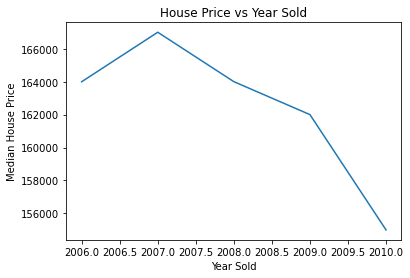

In [122]:
house_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

**Observation:**
    
    After year 2008 because of US recession, house price starts to decrease.

In [124]:
# compare the difference b/w all year features with salesprice.

In [126]:
data  = house_df.copy()
for feature in numerical_features:
    if feature != 'YrSold':
        data[feature]=data['YrSold']-data[feature]
    print(feature, data[feature])
        

Id 0       2007
1       2005
2       2005
3       2002
4       2003
        ... 
1455     551
1456     553
1457     552
1458     551
1459     548
Name: Id, Length: 1460, dtype: int64
MSSubClass 0       1948
1       1987
2       1948
3       1936
4       1948
        ... 
1455    1947
1456    1990
1457    1940
1458    1990
1459    1988
Name: MSSubClass, Length: 1460, dtype: int64
LotFrontage 0       1943.0
1       1927.0
2       1940.0
3       1946.0
4       1924.0
         ...  
1455    1945.0
1456    1925.0
1457    1944.0
1458    1942.0
1459    1933.0
Name: LotFrontage, Length: 1460, dtype: float64
LotArea 0       -6442
1       -7593
2       -9242
3       -7544
4      -12252
        ...  
1455    -5910
1456   -11165
1457    -7032
1458    -7707
1459    -7929
Name: LotArea, Length: 1460, dtype: int64
OverallQual 0       2001
1       2001
2       2001
3       1999
4       2000
        ... 
1455    2001
1456    2004
1457    2003
1458    2005
1459    2003
Name: OverallQual, Length: 1460, d

**Observations:**

    Newer built houses are costlier than older ones.

## Numerical variables - 2 types

### Continous variables and discrete features

In [128]:
discrete_Features = [feature for feature in numerical_features 
                     if len(house_df[feature].unique())>=25]

In [130]:
discrete_Features


['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [131]:
print(len(discrete_Features))

20


In [132]:
# find relationship b/w discrete and salesprice

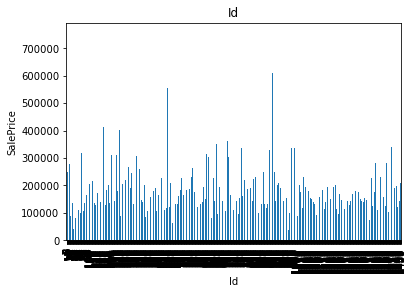

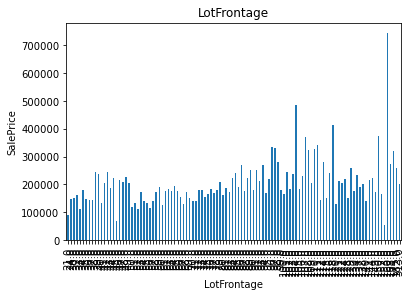

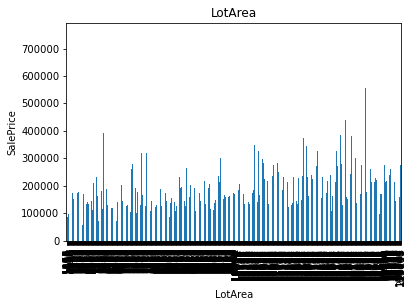

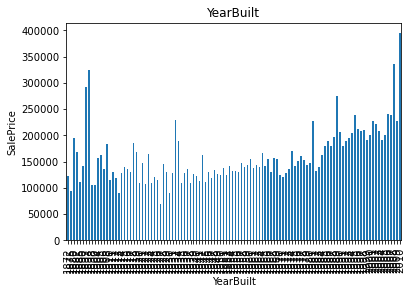

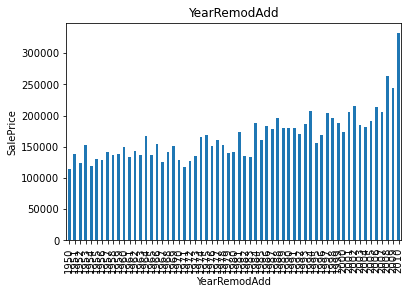

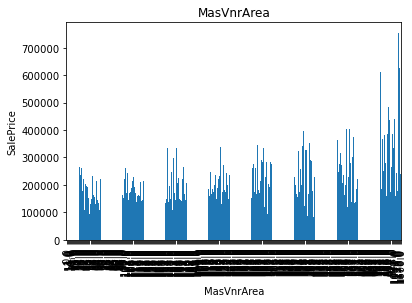

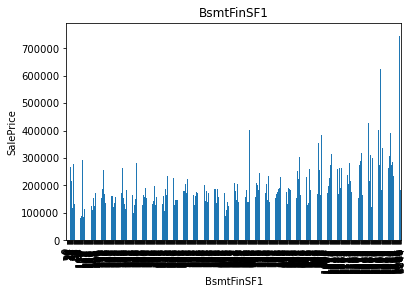

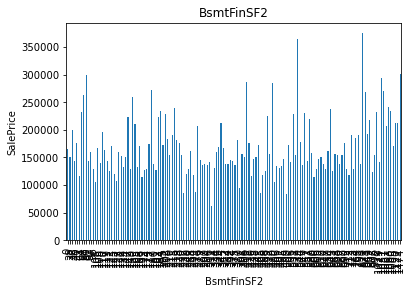

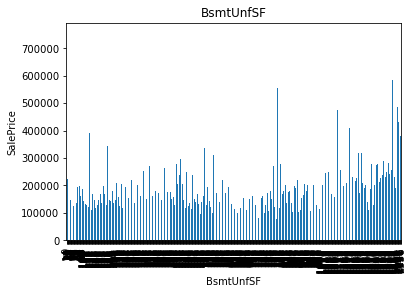

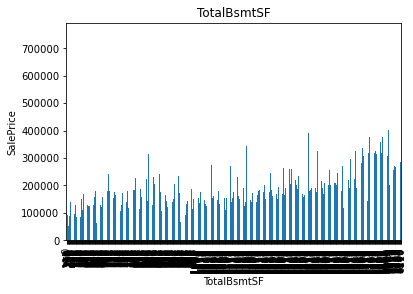

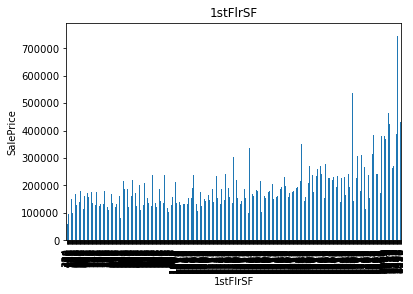

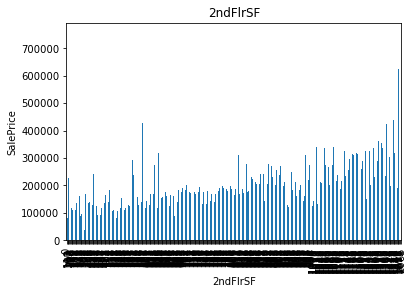

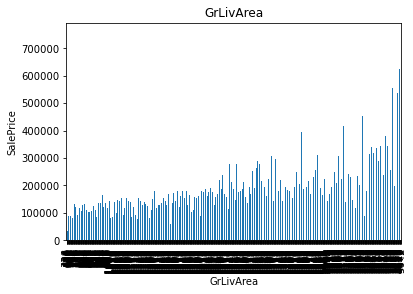

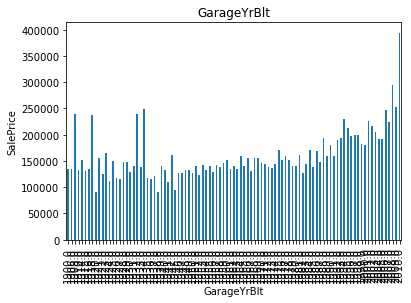

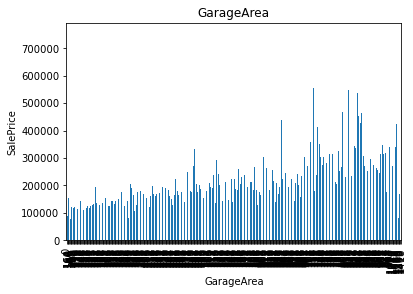

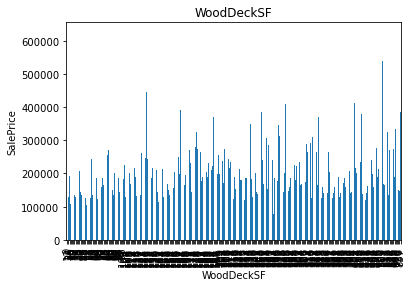

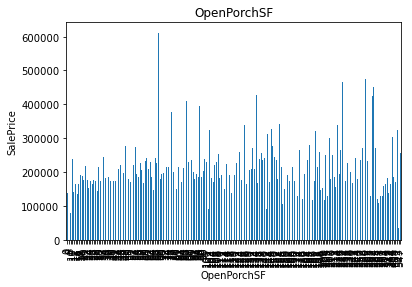

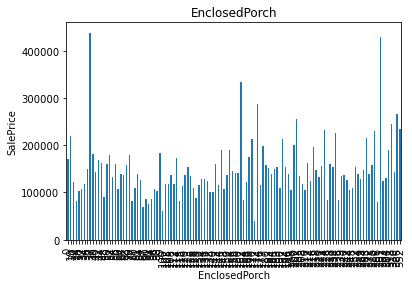

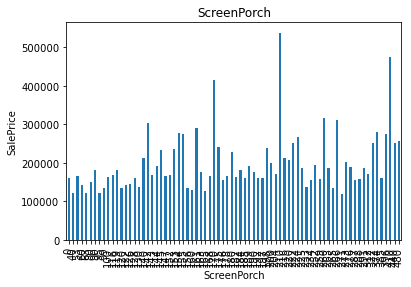

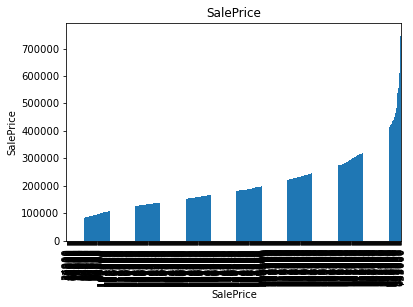

In [133]:
data = house_df.copy()
for featureq in discrete_Features:
    data.groupby(featureq)['SalePrice'].median().plot.bar()
    plt.xlabel(featureq)
    plt.ylabel('SalePrice')
    plt.title(featureq)
    plt.show()

**Observations:**



Ghere is a relationship b/w discrete features and SalePrice variable.

### Continous features

In [138]:
continous_features = [feature for feature in numerical_features
                      if feature not in discrete_Features+temporal_features
                     ]

In [139]:
continous_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [141]:
# analyze the continous features with saleprice to find relationship

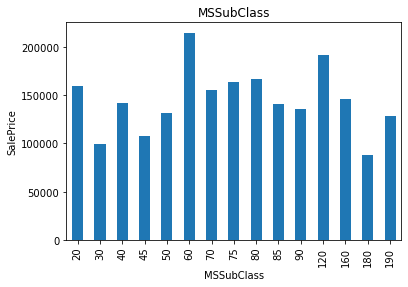

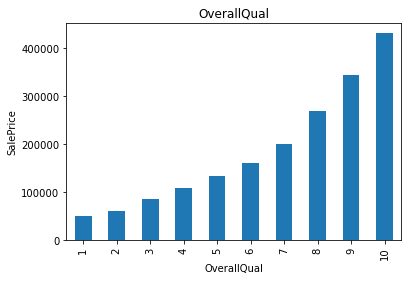

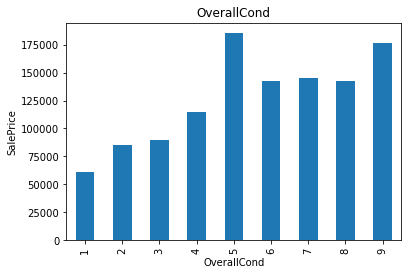

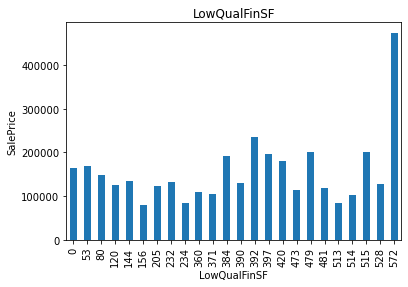

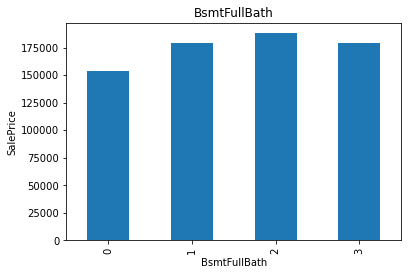

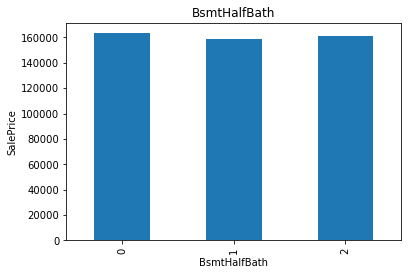

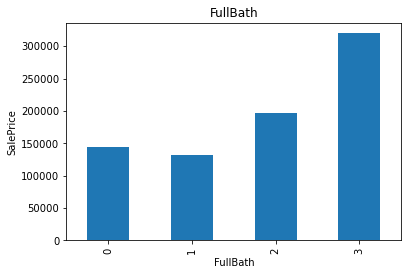

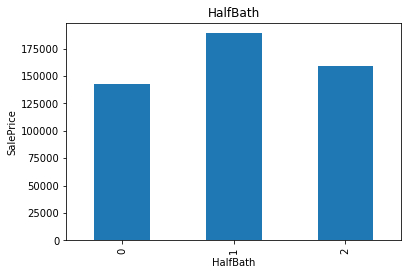

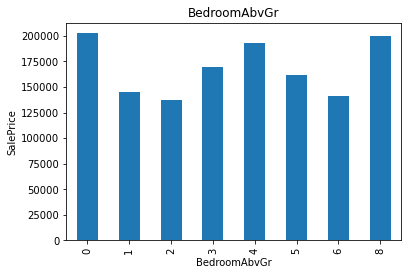

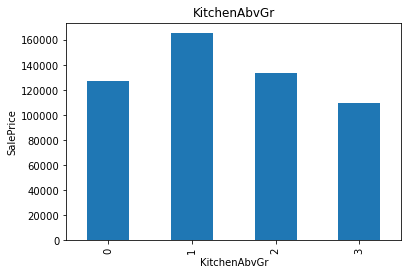

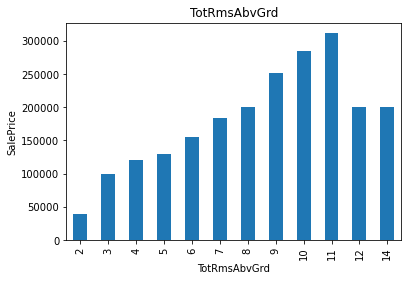

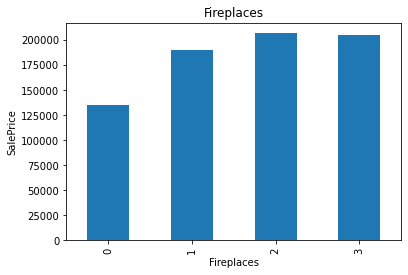

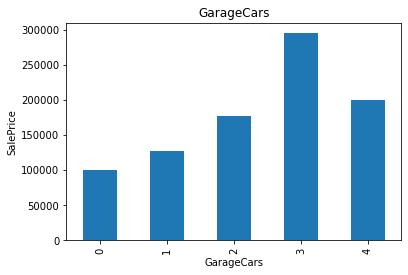

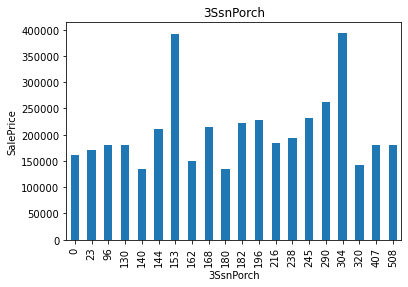

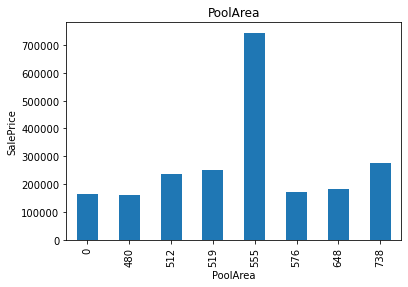

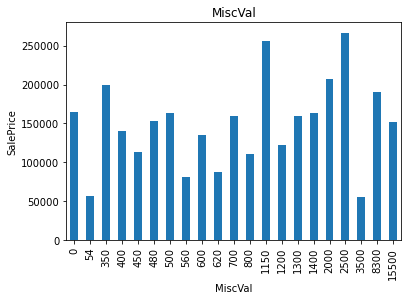

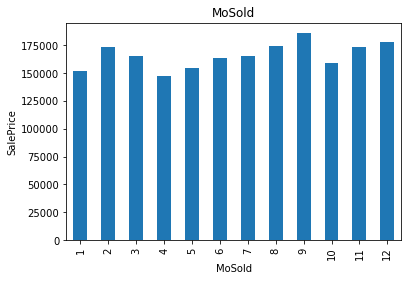

In [145]:
data  =  house_df.copy()
for feature in continous_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## EDA PART 2

In [142]:
# using logarithmic transformation

In [143]:
data = house_df.copy()

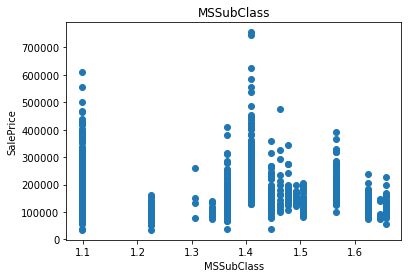

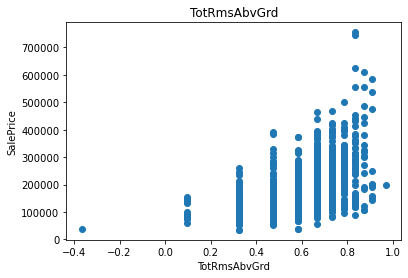

In [147]:
for feature in continous_features:
    if 0 in data[feature].unique():
        pass
    else: 
        # find log of each feature         
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

**Observation :**
    

## Outliers

In [151]:
for feature in continous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        sns.boxplot(feature)
        plt.ylabel(feature)
        plt.xlabel(feature)
        plt.show()

/home/fact12/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Could not interpret input 'MSSubClass'

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

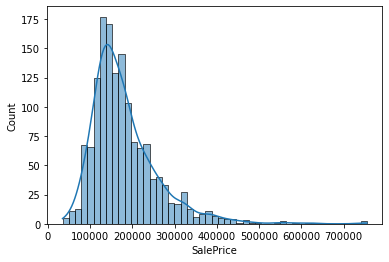

In [149]:
sns.histplot(house_df['SalePrice'], kde=True)

## Working with Categorical features

In [154]:
categorical_features = [feature for feature in house_df.columns if house_df[feature].dtypes == 'O']

In [155]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [156]:
len(categorical_features)

43

In [157]:
house_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [158]:
for feature in categorical_features:
    print(f'feature name is {feature} and no of categories are {len(feature)} ')

feature name is MSZoning and no of categories are 8 
feature name is Street and no of categories are 6 
feature name is Alley and no of categories are 5 
feature name is LotShape and no of categories are 8 
feature name is LandContour and no of categories are 11 
feature name is Utilities and no of categories are 9 
feature name is LotConfig and no of categories are 9 
feature name is LandSlope and no of categories are 9 
feature name is Neighborhood and no of categories are 12 
feature name is Condition1 and no of categories are 10 
feature name is Condition2 and no of categories are 10 
feature name is BldgType and no of categories are 8 
feature name is HouseStyle and no of categories are 10 
feature name is RoofStyle and no of categories are 9 
feature name is RoofMatl and no of categories are 8 
feature name is Exterior1st and no of categories are 11 
feature name is Exterior2nd and no of categories are 11 
feature name is MasVnrType and no of categories are 10 
feature name is Ex

In [159]:
# find the relationship b/w categorical feature and saleprice.

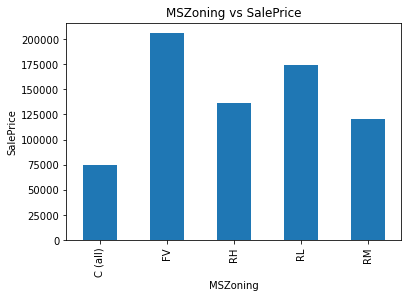

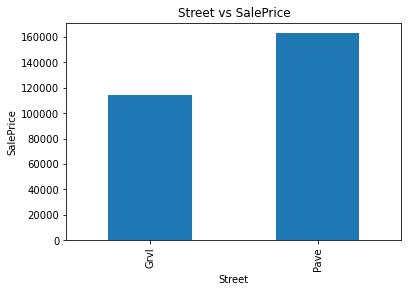

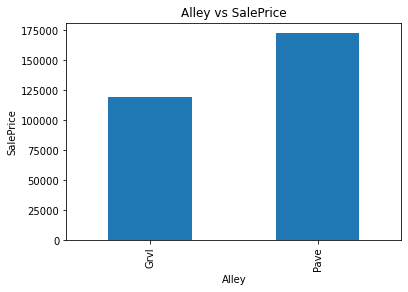

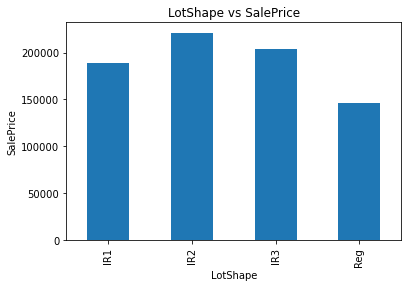

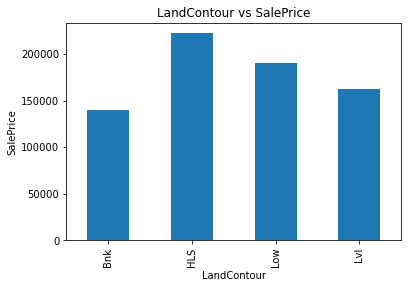

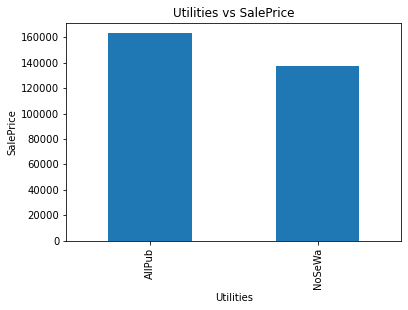

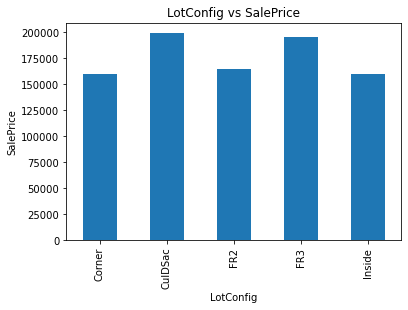

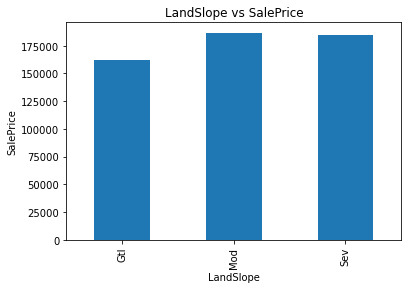

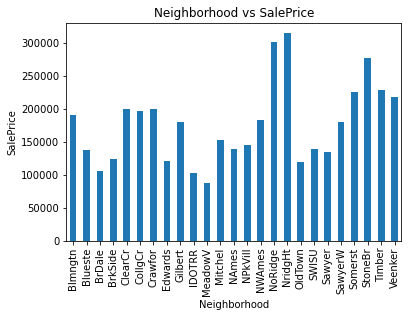

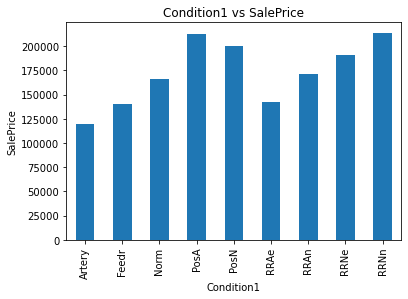

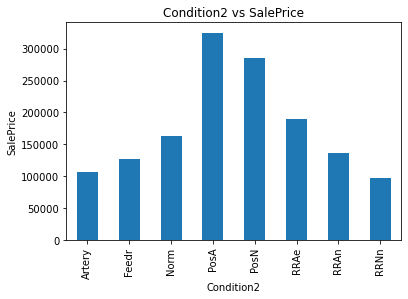

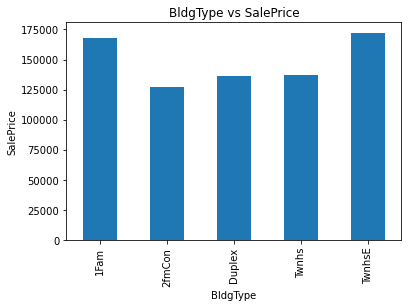

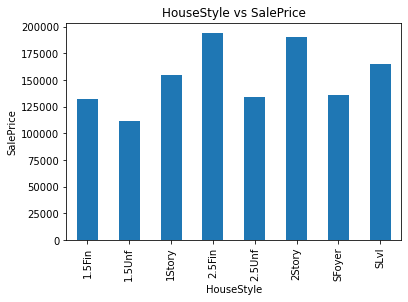

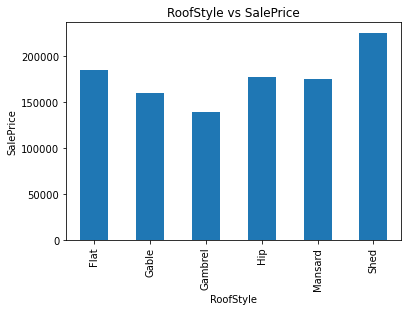

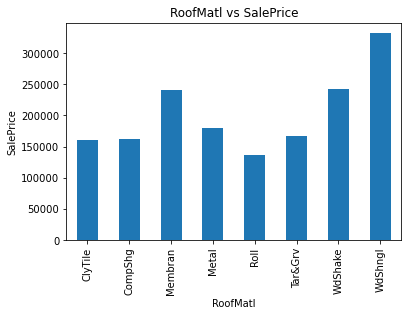

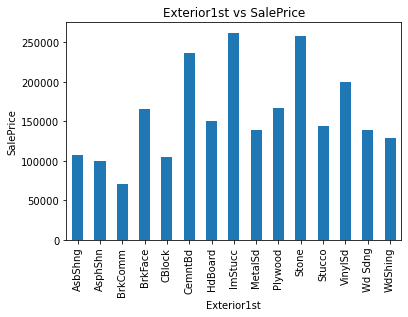

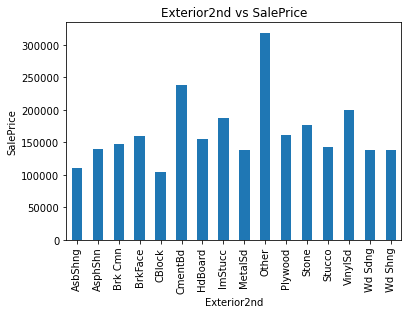

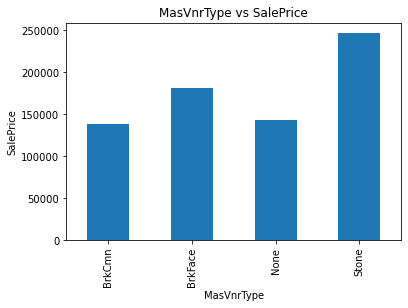

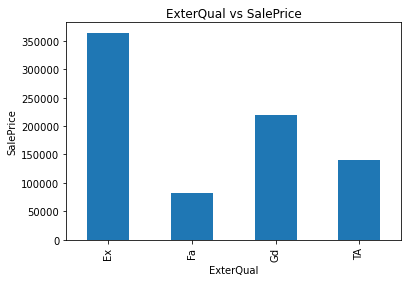

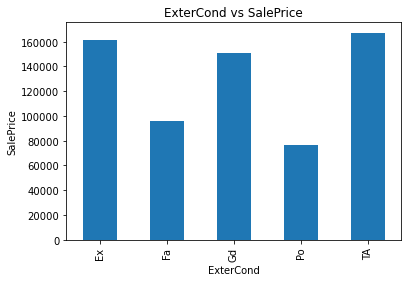

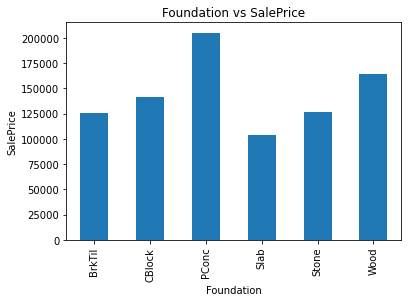

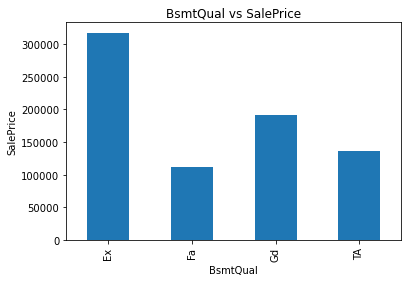

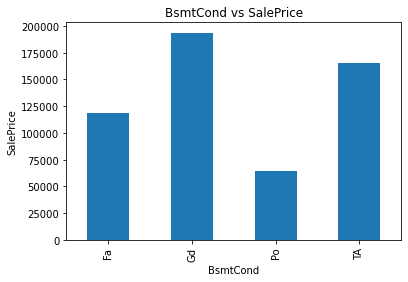

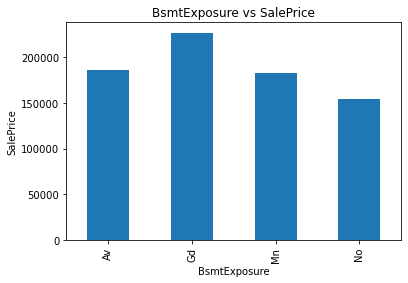

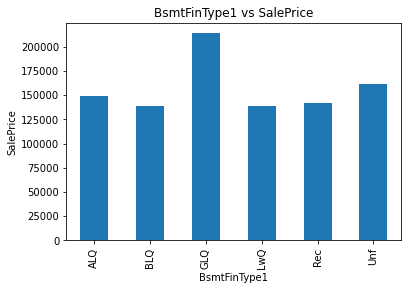

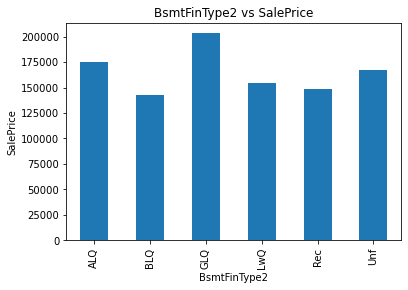

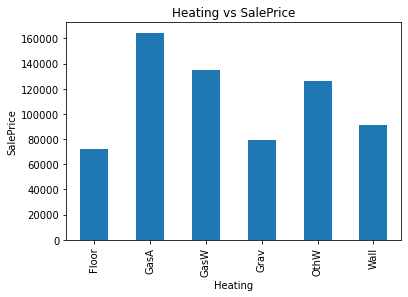

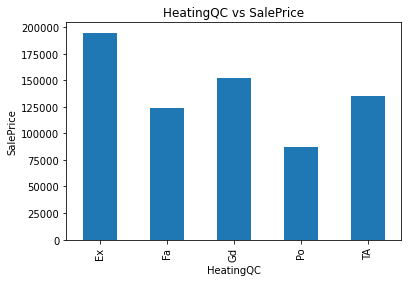

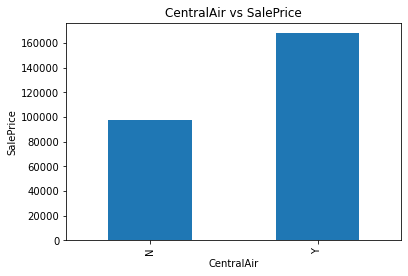

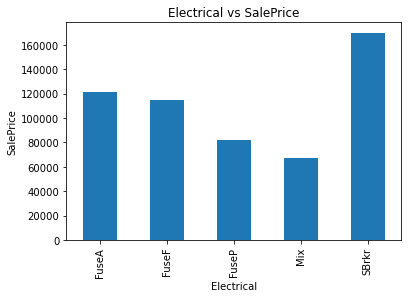

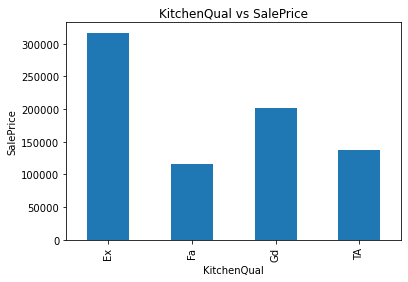

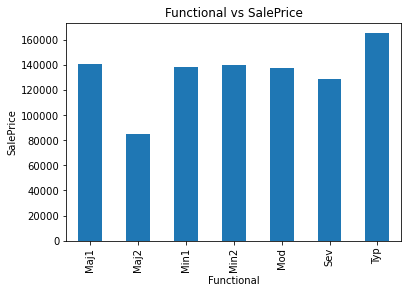

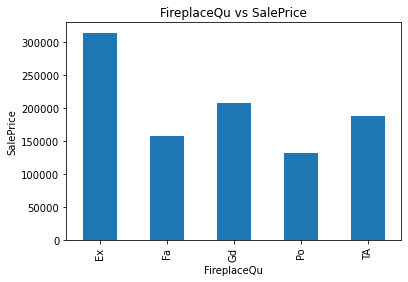

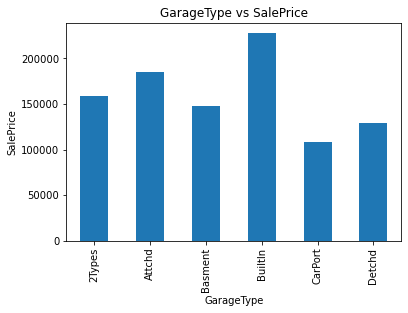

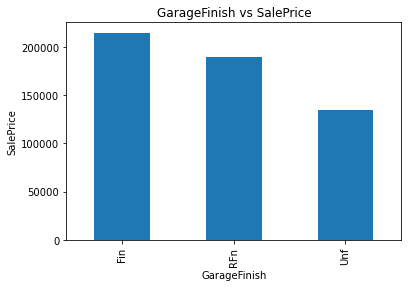

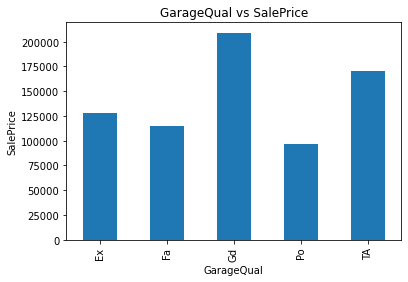

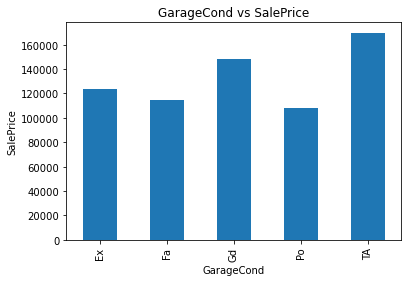

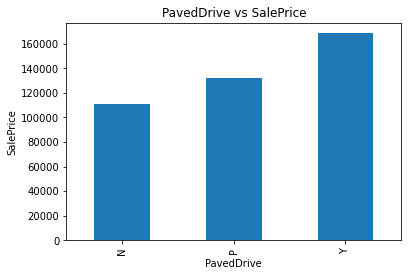

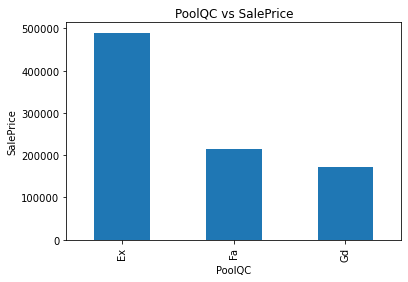

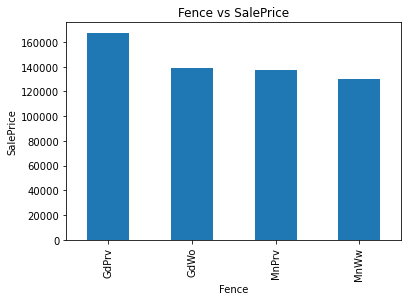

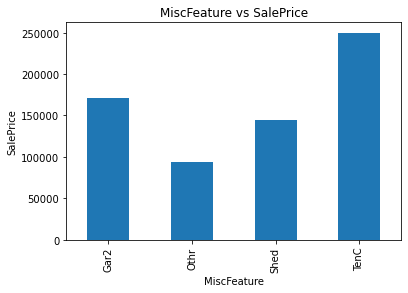

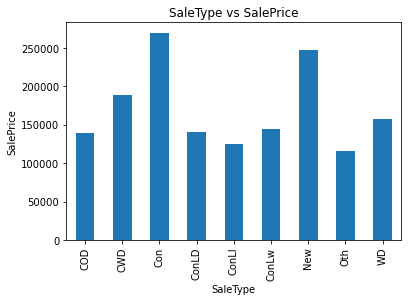

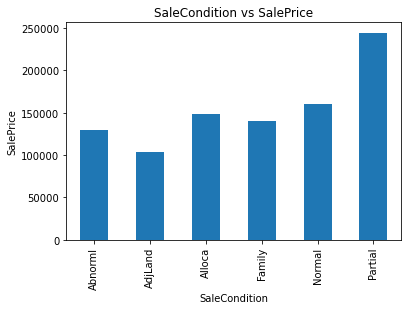

In [163]:
data = house_df.copy()
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.show()

Assignments EDA:
    
    https://www.kaggle.com/competitions/flight-delays-prediction/rules
    https://www.kaggle.com/code/harshavarshney/black-friday-sales-prediction/data?select=train.csv